In [2]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pwd

'/home/jovyan/demo'

In [4]:
%cd /home/jovyan/demo

/home/jovyan/demo


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
df = pd. read_excel (r'final_honda_clean_06.26.2021.xlsx', sheet_name='flat')
print(df)

              id                 region  year    model    Trim   fuel  \
0     7315033808             fort wayne  2011    pilot      ex    gas   
1     7311583118                   bend  2013      fit  lowest    gas   
2     7316850475                 denver  2013    pilot  lowest    gas   
3     7306139476     sarasota-bradenton  2011  odyssey  lowest    gas   
4     7309855934            little rock  2012    civic  lowest    gas   
...          ...                    ...   ...      ...     ...    ...   
3047  7308439140           jacksonville  2019    civic  lowest    gas   
3048  7313910156  western massachusetts  2020    civic  lowest    gas   
3049  7316630031                phoenix  2020    civic      ex    gas   
3050  7316111477                chicago  2019     cr-v  lowest  other   
3051  7302279426            chattanooga  2020     cr-v      ex  other   

      odometer title_status transmission                VIN  ... paint_color  \
0     271300.0        clean    automatic  5

In [7]:
data = df.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2442, 22)
Unseen Data For Predictions: (610, 22)


In [8]:
from pycaret.regression import *
from setuptools import Extension

In [9]:
exp_reg101 = setup(data = data, target = 'Depreciation_Value', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Depreciation_Value
2,Original Data,"(2442, 22)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1709, 2023)"


In [10]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,1562.8546,5066344.7750,2244.4062,0.8074,0.5110,0.3782,10.4330
llar,Lasso Least Angle Regression,1615.3227,5457444.8082,2329.7692,0.7932,0.4945,0.3805,10.8570
gbr,Gradient Boosting Regressor,1629.8976,5484766.4298,2334.2698,0.7924,0.4501,0.4242,2.5350
lightgbm,Light Gradient Boosting Machine,1616.6378,5538531.7349,2344.9532,0.7908,0.4446,0.3804,1.4630
omp,Orthogonal Matching Pursuit,1682.2487,5754115.8929,2392.4694,0.7819,0.4947,0.3995,2.0690
rf,Random Forest Regressor,1665.9448,5857549.6232,2411.0759,0.7785,0.4355,0.3924,6.0530
et,Extra Trees Regressor,1664.5465,5870566.1160,2410.9440,0.7784,0.4352,0.3889,9.1810
en,Elastic Net,1954.1284,7425076.2500,2718.6132,0.7187,0.5107,0.4817,17.1880
lr,Linear Regression,2053.2972,8018069.1500,2824.2335,0.6963,0.5478,0.5081,11.7470
ridge,Ridge Regression,2201.2560,8985256.7500,2983.9691,0.6610,0.5662,0.5251,7.1710


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
from pycaret.regression import *
lasso = create_model('lasso')


In [ ]:
from pycaret.regression import *
tuned_lasso = tune_model(lasso)

In [ ]:
plot_model(tuned_lasso)

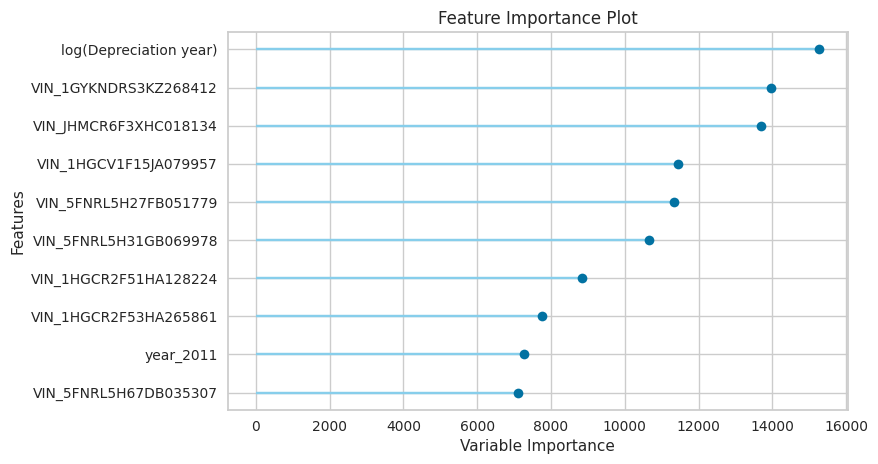

In [26]:
plot_model(tuned_lasso, plot='feature')

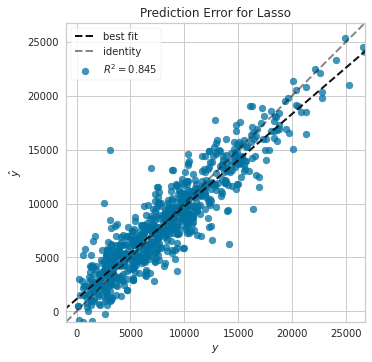

In [27]:
plot_model(tuned_lasso, plot = 'error')

In [33]:
evaluate_model(tuned_lasso)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
predict_model(tuned_lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,1511.8947,3858701.5000,1964.3578,0.8446,0.4279,0.3415


,id,odometer,MSRP,Miles_Year,Amt/Year,log(Depreciation year),MSRP/logyear,log(Miles/year),region_SF bay area,region_abilene,...,state_ut,state_va,state_vt,state_wa,state_wi,Depreciation years_10,Depreciation years_6,Depreciation years_7,Depreciation_Value,Label
0,7.309324e+09,102043.0,28825.0,12755.375000,0.000278,0.903090,31918.193359,4.105693,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12870.0,11837.680664
1,7.314084e+09,79334.0,21380.0,7212.181641,0.000514,1.041393,20530.199219,3.858067,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7430.0,11523.188477
2,7.316721e+09,86130.0,15890.0,14355.000000,0.000378,0.778151,20420.195312,4.157003,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1990.0,1643.447021
3,7.311090e+09,142369.0,18290.0,20338.427734,0.000383,0.845098,21642.458984,4.308317,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9340.0,7261.246094
4,7.313138e+09,72001.0,21955.0,9000.125000,0.000364,0.903090,24310.976562,3.954248,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6505.0,5865.767090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,7.315490e+09,28000.0,39660.0,9333.333008,0.000076,0.477121,83123.523438,3.970037,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3160.0,5631.751465
729,7.314350e+09,74503.0,15890.0,12417.166992,0.000378,0.778151,20420.195312,4.094022,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5199.0,2873.636719
730,7.315791e+09,71627.0,25155.0,14325.400391,0.000199,0.698970,35988.667969,4.156107,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7655.0,4758.429199
731,7.316284e+09,49012.0,23445.0,7001.714355,0.000299,0.845098,27742.343750,3.845204,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1447.0,4253.988281


In [35]:
final_lasso = finalize_model(tuned_lasso)

In [36]:
predict_model(final_lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,1418.2046,3388044.7500,1840.6642,0.8636,0.3867,0.3244


,id,odometer,MSRP,Miles_Year,Amt/Year,log(Depreciation year),MSRP/logyear,log(Miles/year),region_SF bay area,region_abilene,...,state_ut,state_va,state_vt,state_wa,state_wi,Depreciation years_10,Depreciation years_6,Depreciation years_7,Depreciation_Value,Label
0,7.309324e+09,102043.0,28825.0,12755.375000,0.000278,0.903090,31918.193359,4.105693,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12870.0,11761.855469
1,7.314084e+09,79334.0,21380.0,7212.181641,0.000514,1.041393,20530.199219,3.858067,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7430.0,10913.326172
2,7.316721e+09,86130.0,15890.0,14355.000000,0.000378,0.778151,20420.195312,4.157003,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1990.0,1668.349121
3,7.311090e+09,142369.0,18290.0,20338.427734,0.000383,0.845098,21642.458984,4.308317,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9340.0,7461.108398
4,7.313138e+09,72001.0,21955.0,9000.125000,0.000364,0.903090,24310.976562,3.954248,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6505.0,5915.294434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,7.315490e+09,28000.0,39660.0,9333.333008,0.000076,0.477121,83123.523438,3.970037,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3160.0,5886.374512
729,7.314350e+09,74503.0,15890.0,12417.166992,0.000378,0.778151,20420.195312,4.094022,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5199.0,3040.741211
730,7.315791e+09,71627.0,25155.0,14325.400391,0.000199,0.698970,35988.667969,4.156107,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7655.0,4901.352539
731,7.316284e+09,49012.0,23445.0,7001.714355,0.000299,0.845098,27742.343750,3.845204,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1447.0,4204.105957


In [38]:
import pandas as pd
testfile = pd. read_excel (r'test_prediction_test.xlsx', sheet_name='Sheet2')

In [39]:
new_prediction = predict_model(final_lasso, data=testfile)
print(new_prediction)

   id          region  year   model    Trim fuel  odometer title_status  \
0   1        stockton  2018   civic  lowest  gas    100000        clean   
1   2            bend  2018    cr-v  lowest  gas     60000        clean   
2   3       charlotte  2018    hr-v      ex  gas     59800        clean   
3   4  washington, DC  2018  accord  lowest  gas    100150        clean   
4   5    st louis, MO  2019   pilot  lowest  gas    100020        clean   

  transmission                VIN  ... state   MSRP Depreciation years  \
0    Automatic  2HGFC2F7XJH576400  ...    ca  20150                  5   
1    Automatic  5J6RW2H8XJL020500  ...    or  24250                  3   
2    Automatic  3CZRU6H54JM711650  ...    nc  19670                  5   
3    Automatic  5J6TF1H55BL003470  ...    dc  23570                  5   
4    Automatic  5FNYF6H95KB007289  ...    il  31450                  4   

  Miles_Year  Amt/Year  log(Depreciation year)  MSRP/logyear  log(Miles/year)  \
0      20000  1.007500 

In [40]:
new_prediction.to_excel('output.xlsx')